# Supervised Machine Learning: Regression

#### This script contains the following:

1. Importing Libraries
2. Data Cleaning
3. Data Prep for Regression Analysis
4. Regression Analysis

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Define path

path = r'/Users/tsique/Desktop/CareerFoundry - Data Analytics/3 Immersion/Final Project'

In [4]:
us_shoot = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'us_shoot_clean.csv'), index_col = 0)

In [5]:
#Checking dataframe imported correctly

us_shoot

,id,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,...,year,month,day,threat_level_2,race_Asian,race_Black,race_Hispanic,race_Native,race_Other,race_White
0,1,2015-01-02,shot,gun,53.0,2.0,Shelton,WA,True,attack,...,2015,1,2,2.0,1,0,0,0,0,0
1,2,2015-01-02,shot,gun,47.0,2.0,Aloha,OR,False,attack,...,2015,1,2,2.0,0,0,0,0,0,1
2,3,2015-01-03,shot and Tasered,unarmed,23.0,2.0,Wichita,KS,False,other,...,2015,1,3,1.0,0,0,1,0,0,0
3,4,2015-01-04,shot,toy weapon,32.0,2.0,San Francisco,CA,True,attack,...,2015,1,4,2.0,0,0,0,0,0,1
4,5,2015-01-04,shot,nail gun,39.0,2.0,Evans,CO,False,attack,...,2015,1,4,2.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,7725,2022-09-07,shot,screwdriver,NaN,2.0,Flagstaff,AZ,False,other,...,2022,9,7,1.0,0,0,0,0,0,0
7725,7726,2022-09-07,shot,gun,NaN,2.0,Springville,AL,False,attack,...,2022,9,7,2.0,0,0,0,0,0,1
7726,7727,2022-09-07,shot,knife,61.0,2.0,St. Louis,MO,False,other,...,2022,9,7,1.0,0,1,0,0,0,0
7727,7728,2022-09-07,shot,gun,27.0,2.0,Washington County,TN,False,attack,...,2022,9,7,2.0,0,0,0,0,0,0


## 2. Data Cleaning

In [6]:
# Checking column names

us_shoot.columns

Index(['id', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'year', 'month', 'day', 'threat_level_2', 'race_Asian',
       'race_Black', 'race_Hispanic', 'race_Native', 'race_Other',
       'race_White'],
      dtype='object')

In [7]:
# Checking for missing values

us_shoot.isnull().sum()

id                           0
date                         0
manner_of_death              0
armed                      209
age                        482
gender                      20
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       875
body_camera                  0
year                         0
month                        0
day                          0
threat_level_2               0
race_Asian                   0
race_Black                   0
race_Hispanic                0
race_Native                  0
race_Other                   0
race_White                   0
dtype: int64

In [8]:
# Creating df_nan with age

df_nan = us_shoot[us_shoot['age'].isnull() == True]

In [9]:
# Checking df_nan results 

df_nan

,id,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,...,year,month,day,threat_level_2,race_Asian,race_Black,race_Hispanic,race_Native,race_Other,race_White
127,128,2015-02-20,shot,gun,NaN,2.0,Houston,TX,False,attack,...,2015,2,20,2.0,0,0,1,0,0,0
769,770,2015-10-12,shot,gun,NaN,2.0,Lawton,OK,False,attack,...,2015,10,12,2.0,0,1,0,0,0,0
809,810,2015-10-24,shot,gun,NaN,2.0,New Paltz,NY,False,attack,...,2015,10,24,2.0,0,0,0,0,0,0
819,820,2015-10-29,shot,gun,NaN,2.0,Columbus,OH,False,other,...,2015,10,29,1.0,0,1,0,0,0,0
932,933,2015-12-10,shot,gun,NaN,2.0,Hemet,CA,False,attack,...,2015,12,10,2.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,7716,2022-09-03,shot,gun,NaN,2.0,Spokane,WA,False,other,...,2022,9,3,1.0,0,0,0,0,0,0
7718,7719,2022-09-03,shot,undetermined,NaN,2.0,Englewood,NJ,False,undetermined,...,2022,9,3,0.0,0,0,0,0,0,0
7723,7724,2022-09-06,shot,gun,NaN,2.0,Strongs Prairie,WI,False,other,...,2022,9,6,1.0,0,0,0,0,0,0
7724,7725,2022-09-07,shot,screwdriver,NaN,2.0,Flagstaff,AZ,False,other,...,2022,9,7,1.0,0,0,0,0,0,0


In [10]:
# Creating dataframe without missing age values

us_shoot_2 = us_shoot[us_shoot['age'].isnull() == False]
us_shoot_2

,id,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,...,year,month,day,threat_level_2,race_Asian,race_Black,race_Hispanic,race_Native,race_Other,race_White
0,1,2015-01-02,shot,gun,53.0,2.0,Shelton,WA,True,attack,...,2015,1,2,2.0,1,0,0,0,0,0
1,2,2015-01-02,shot,gun,47.0,2.0,Aloha,OR,False,attack,...,2015,1,2,2.0,0,0,0,0,0,1
2,3,2015-01-03,shot and Tasered,unarmed,23.0,2.0,Wichita,KS,False,other,...,2015,1,3,1.0,0,0,1,0,0,0
3,4,2015-01-04,shot,toy weapon,32.0,2.0,San Francisco,CA,True,attack,...,2015,1,4,2.0,0,0,0,0,0,1
4,5,2015-01-04,shot,nail gun,39.0,2.0,Evans,CO,False,attack,...,2015,1,4,2.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7721,7722,2022-09-05,shot,unarmed,32.0,2.0,Cleveland,OH,True,attack,...,2022,9,5,2.0,0,0,0,0,0,0
7722,7723,2022-09-05,shot,gun,63.0,2.0,Wasilla,AK,False,attack,...,2022,9,5,2.0,0,0,0,0,0,0
7726,7727,2022-09-07,shot,knife,61.0,2.0,St. Louis,MO,False,other,...,2022,9,7,1.0,0,1,0,0,0,0
7727,7728,2022-09-07,shot,gun,27.0,2.0,Washington County,TN,False,attack,...,2022,9,7,2.0,0,0,0,0,0,0


In [11]:
# Checking for duplicates 

dups = us_shoot_2.duplicated()
dups.shape

(7247,)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

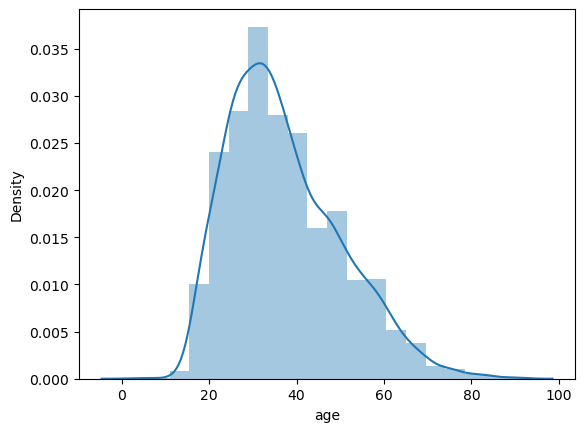

In [12]:
# Extreme values check

sns.distplot(us_shoot_2['age'], bins = 20)

In [13]:
# Check the max 

us_shoot_2['age'].max()

92.0

In [14]:
# Check the mean

us_shoot_2['age'].mean()

37.17897060852766

In [15]:
# Check the min

us_shoot_2['age'].min()

2.0

## 3. Data Prep for Regression Analysis

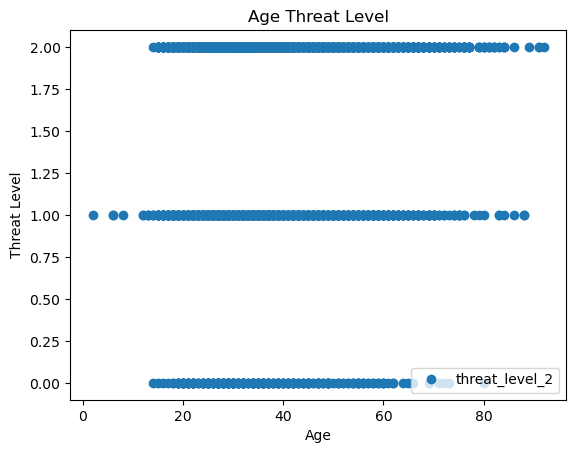

In [16]:
# Create a scatterplot using matplotlib 

us_shoot_2.plot(y = 'threat_level_2', x = 'age', style = 'o')
plt.title('Age Threat Level')
plt.xlabel('Age')
plt.ylabel('Threat Level')
plt.show()

### Hypothesis: 

As a person gets older their threat level will increase.

In [17]:
# Reshape the variables into NumPy arrays and into separate objects

X = us_shoot_2['threat_level_2'].values.reshape(-1,1)
y = us_shoot_2['age'].values.reshape(-1,1)

In [18]:
X

array([[2.],
       [2.],
       [1.],
       ...,
       [1.],
       [2.],
       [2.]])

In [19]:
y

array([[53.],
       [47.],
       [23.],
       ...,
       [61.],
       [27.],
       [30.]])

In [20]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 4. Regression Analysis

In [21]:
# Create a regression object.

regression = LinearRegression()

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

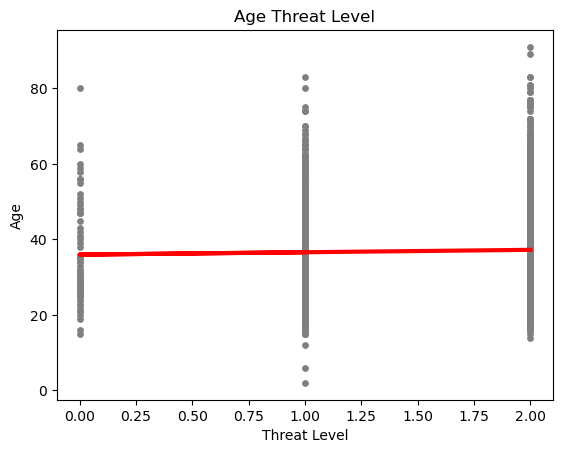

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age Threat Level')
plot_test.xlabel('Threat Level')
plot_test.ylabel('Age')
plot_test.show()

#### How well does the line appears to fit the data?

Due to the data being very linear, it is difficult to tell how well the line fits the data.

In [25]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [26]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.63528382]]
Mean squared error:  174.3516831759807
R2 score:  0.0009777048731146598


In [27]:
y_predicted

array([[37.25106979],
       [37.25106979],
       [36.61578597],
       ...,
       [36.61578597],
       [37.25106979],
       [36.61578597]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,30.0,37.251070
1,19.0,37.251070
2,16.0,36.615786
3,53.0,36.615786
4,46.0,37.251070
5,54.0,37.251070
6,38.0,36.615786
7,21.0,36.615786
8,21.0,37.251070
9,35.0,37.251070


#### Compare the predicted y values with the actual y values in a dataframe.

Looking at the predicted and actual y values, the predicted values are between 36-37 while the actual values flctuate from 16 - 76.

In [29]:
# Predict

y_predicted_train = regression.predict(X_train)

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.63528382]]
Mean squared error:  165.10497331802264
R2 score:  0.0007641899862449453


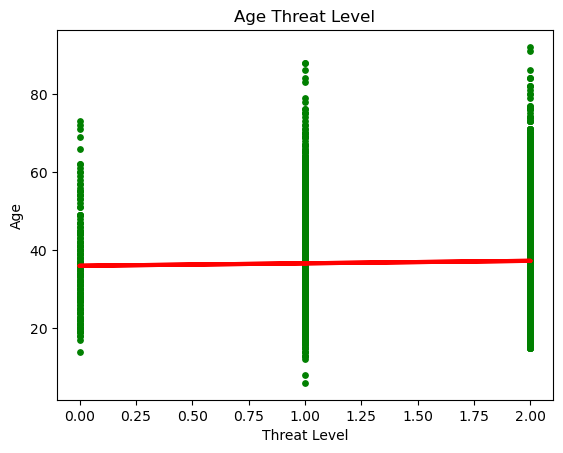

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age Threat Level')
plot_test.xlabel('Threat Level')
plot_test.ylabel('Age')
plot_test.show()

#### Include your thoughts on how well the model performed on the test set.

It seems as though the model performed as well as it could with the provided data. As stated earlier, the scatter plot is more linear than scattered, making it difficult to find a relationship and it contains predictions that are very close together.